# Baseball case study

### Problem statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

In [1]:
#lets import the visualization tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

#import the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#import the metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_roc_curve, classification_report
from sklearn.metrics import f1_score, recall_score, precision_score

#lets filter the warnings
import warnings
warnings.filterwarnings('ignore')

# Reading / Importing the dataset

In [2]:
df=pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Details of data

-W Number of wins

-R Runs scored

-AB At bats

-H Hits by batters

-2B Double plays

-3B Triples plays

-HR Homeruns by batters

-BB Walks by batters

-SO Strikeouts

-SB Stolen Bases

-RA Runs Allowed

-ER Earned Runs

-ERA Earned Run Average (ERA)

-SHO Shutouts

-SV Saves

-E Errors

1. No. of wins is output/label column 

2. Rest are inputs.

In [3]:
#info about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [4]:
df.shape

(30, 17)

30 Rows and 17 columns are there in dataset.

In [5]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

### CHECKING NULL VALUES

In [6]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There is no null value present in the dataset , so we can proceed further for EDA part .

<AxesSubplot:>

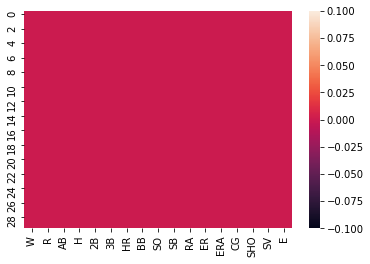

In [7]:
sns.heatmap(df.isnull())

# EDA / Data Analysis

In [8]:
#statistical summary

df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Outliers are present and skewness is also there as SD is very high in some columns , that we'll detect by using z score.

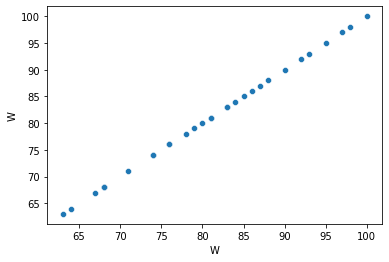

<Figure size 2160x2160 with 0 Axes>

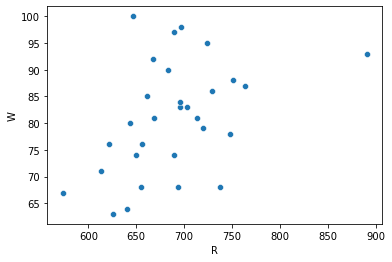

<Figure size 2160x2160 with 0 Axes>

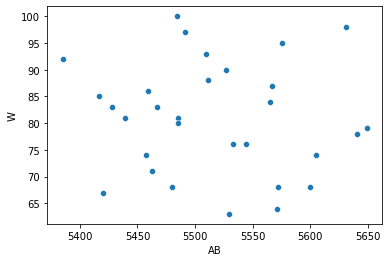

<Figure size 2160x2160 with 0 Axes>

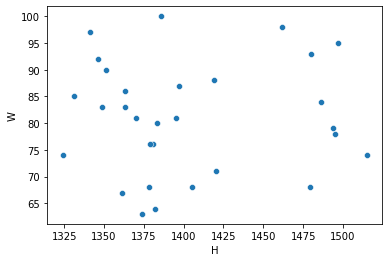

<Figure size 2160x2160 with 0 Axes>

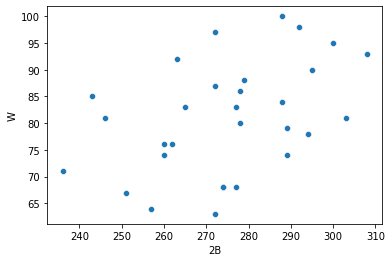

<Figure size 2160x2160 with 0 Axes>

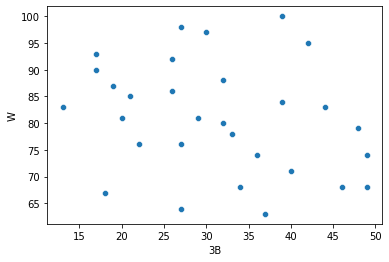

<Figure size 2160x2160 with 0 Axes>

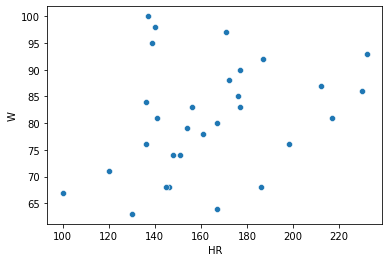

<Figure size 2160x2160 with 0 Axes>

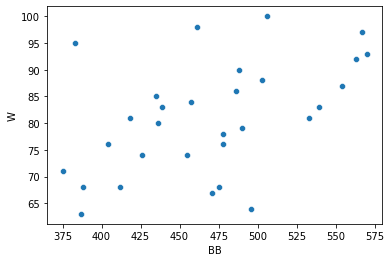

<Figure size 2160x2160 with 0 Axes>

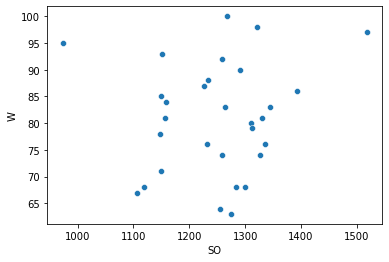

<Figure size 2160x2160 with 0 Axes>

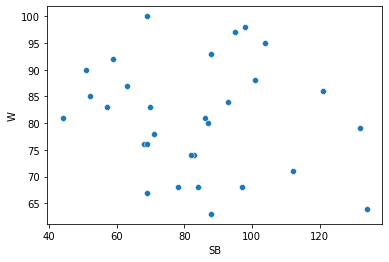

<Figure size 2160x2160 with 0 Axes>

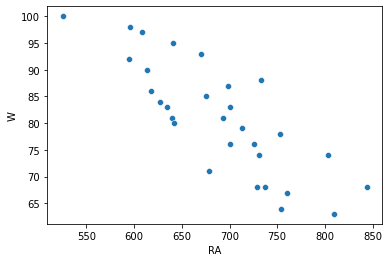

<Figure size 2160x2160 with 0 Axes>

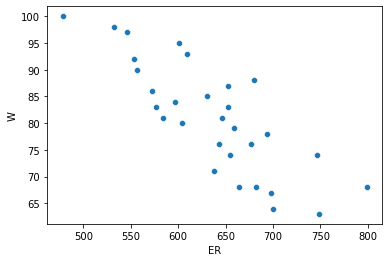

<Figure size 2160x2160 with 0 Axes>

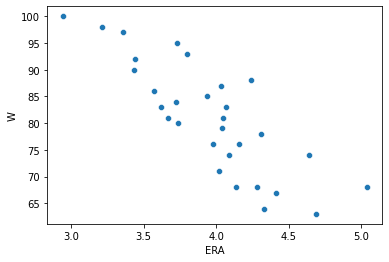

<Figure size 2160x2160 with 0 Axes>

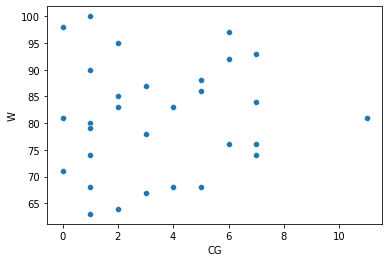

<Figure size 2160x2160 with 0 Axes>

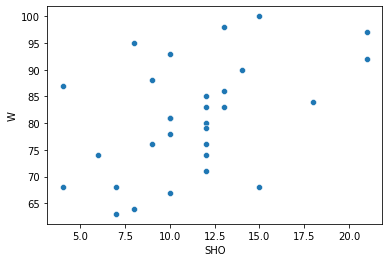

<Figure size 2160x2160 with 0 Axes>

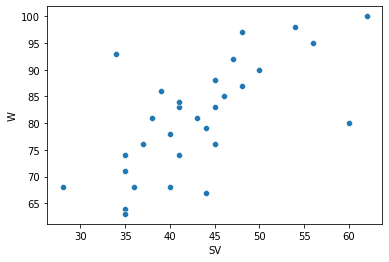

<Figure size 2160x2160 with 0 Axes>

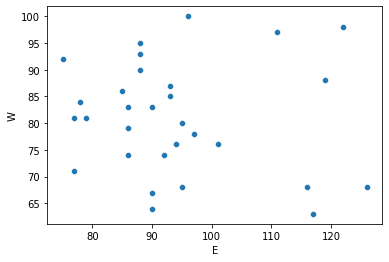

<Figure size 2160x2160 with 0 Axes>

In [9]:
#to check the relationship of W column with other variables .

for col in df:
    sns.scatterplot(x=col,y='W',data=df)
    plt.figure(figsize=(30,30))
    plt.show()

From above , we can see  that HR , R, BB  has positive correlation with W (Wins) variable and ER, ERA , RA has negative relation with wins. Rest we'll check it with the help of correlation graph.

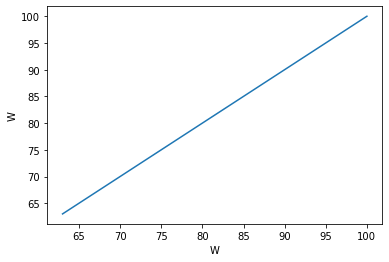

<Figure size 2160x2160 with 0 Axes>

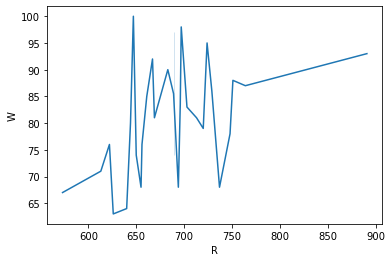

<Figure size 2160x2160 with 0 Axes>

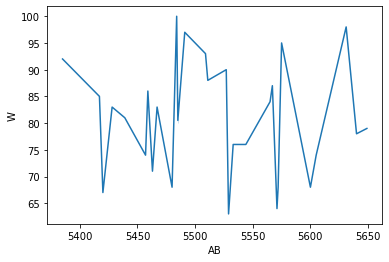

<Figure size 2160x2160 with 0 Axes>

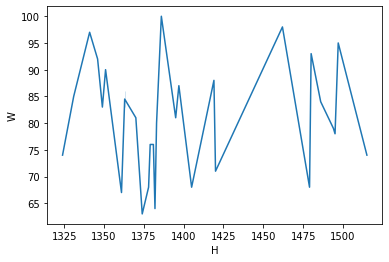

<Figure size 2160x2160 with 0 Axes>

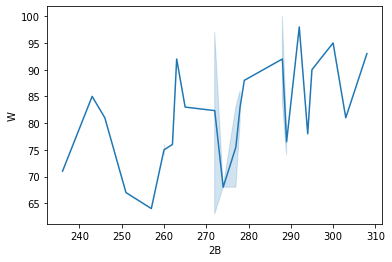

<Figure size 2160x2160 with 0 Axes>

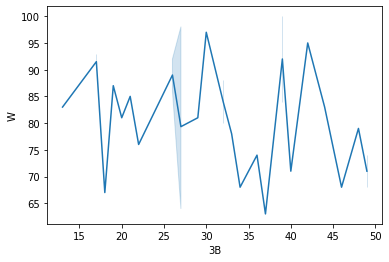

<Figure size 2160x2160 with 0 Axes>

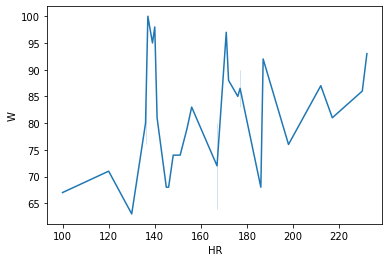

<Figure size 2160x2160 with 0 Axes>

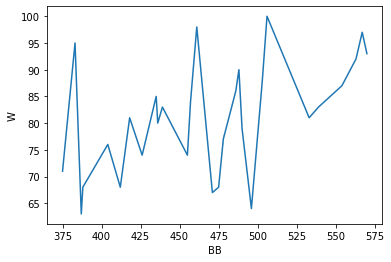

<Figure size 2160x2160 with 0 Axes>

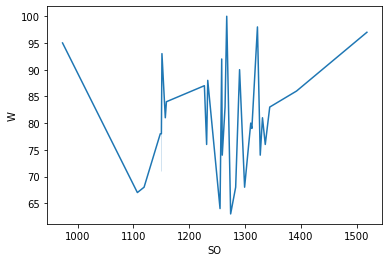

<Figure size 2160x2160 with 0 Axes>

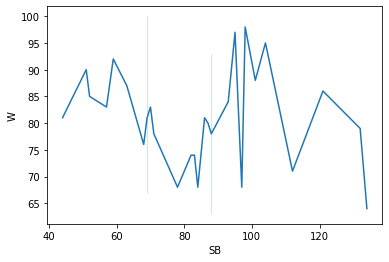

<Figure size 2160x2160 with 0 Axes>

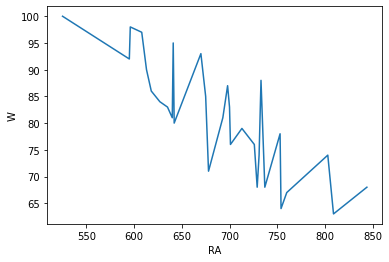

<Figure size 2160x2160 with 0 Axes>

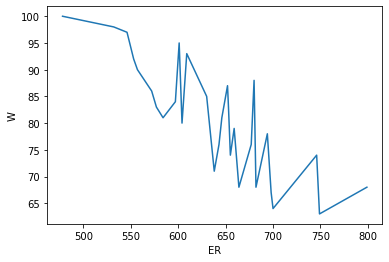

<Figure size 2160x2160 with 0 Axes>

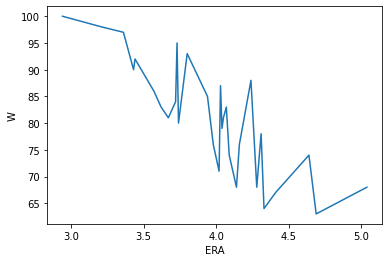

<Figure size 2160x2160 with 0 Axes>

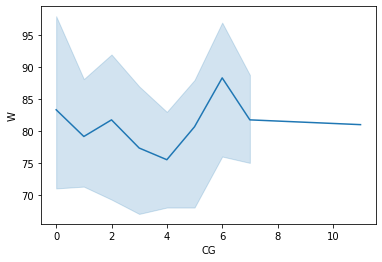

<Figure size 2160x2160 with 0 Axes>

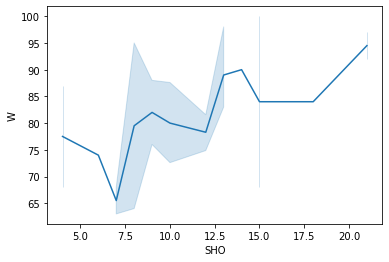

<Figure size 2160x2160 with 0 Axes>

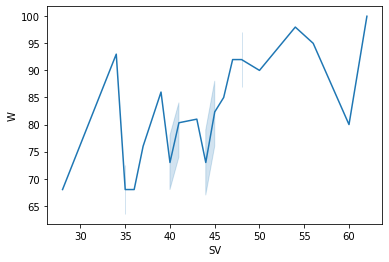

<Figure size 2160x2160 with 0 Axes>

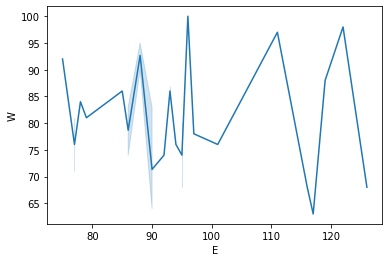

<Figure size 2160x2160 with 0 Axes>

In [11]:
for col in df:
    sns.lineplot(x=col,y='W',data=df)
    plt.figure(figsize=(30,30))
    plt.show()

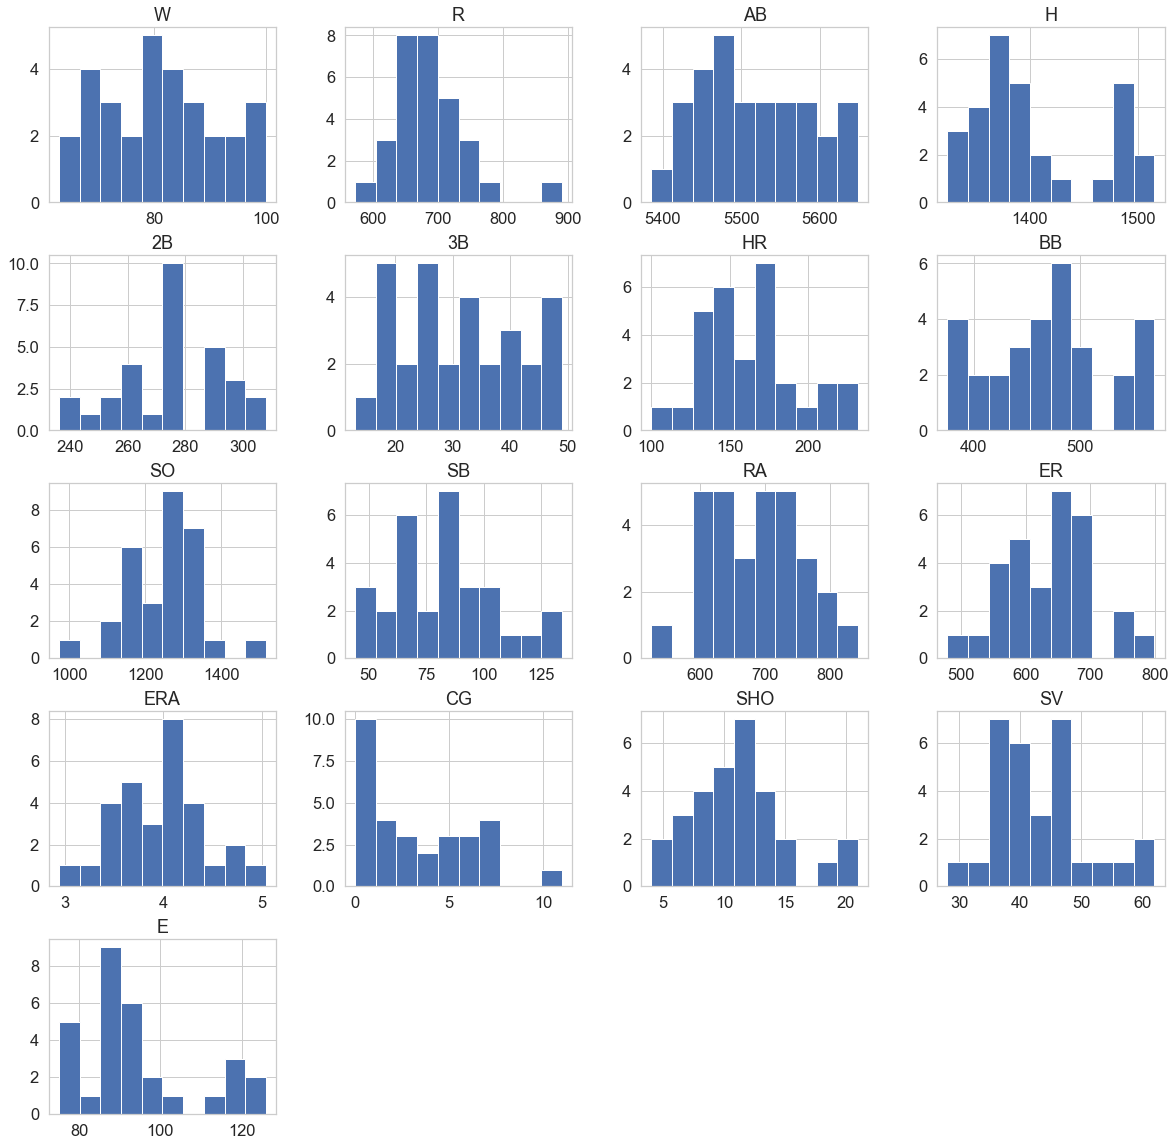

In [13]:
#to check the distribution of the data

sns.set(style='whitegrid', palette="deep", font_scale=1.5)
df.hist(figsize=(20, 20));

#from above we can see that in some features t, skewness is present there.

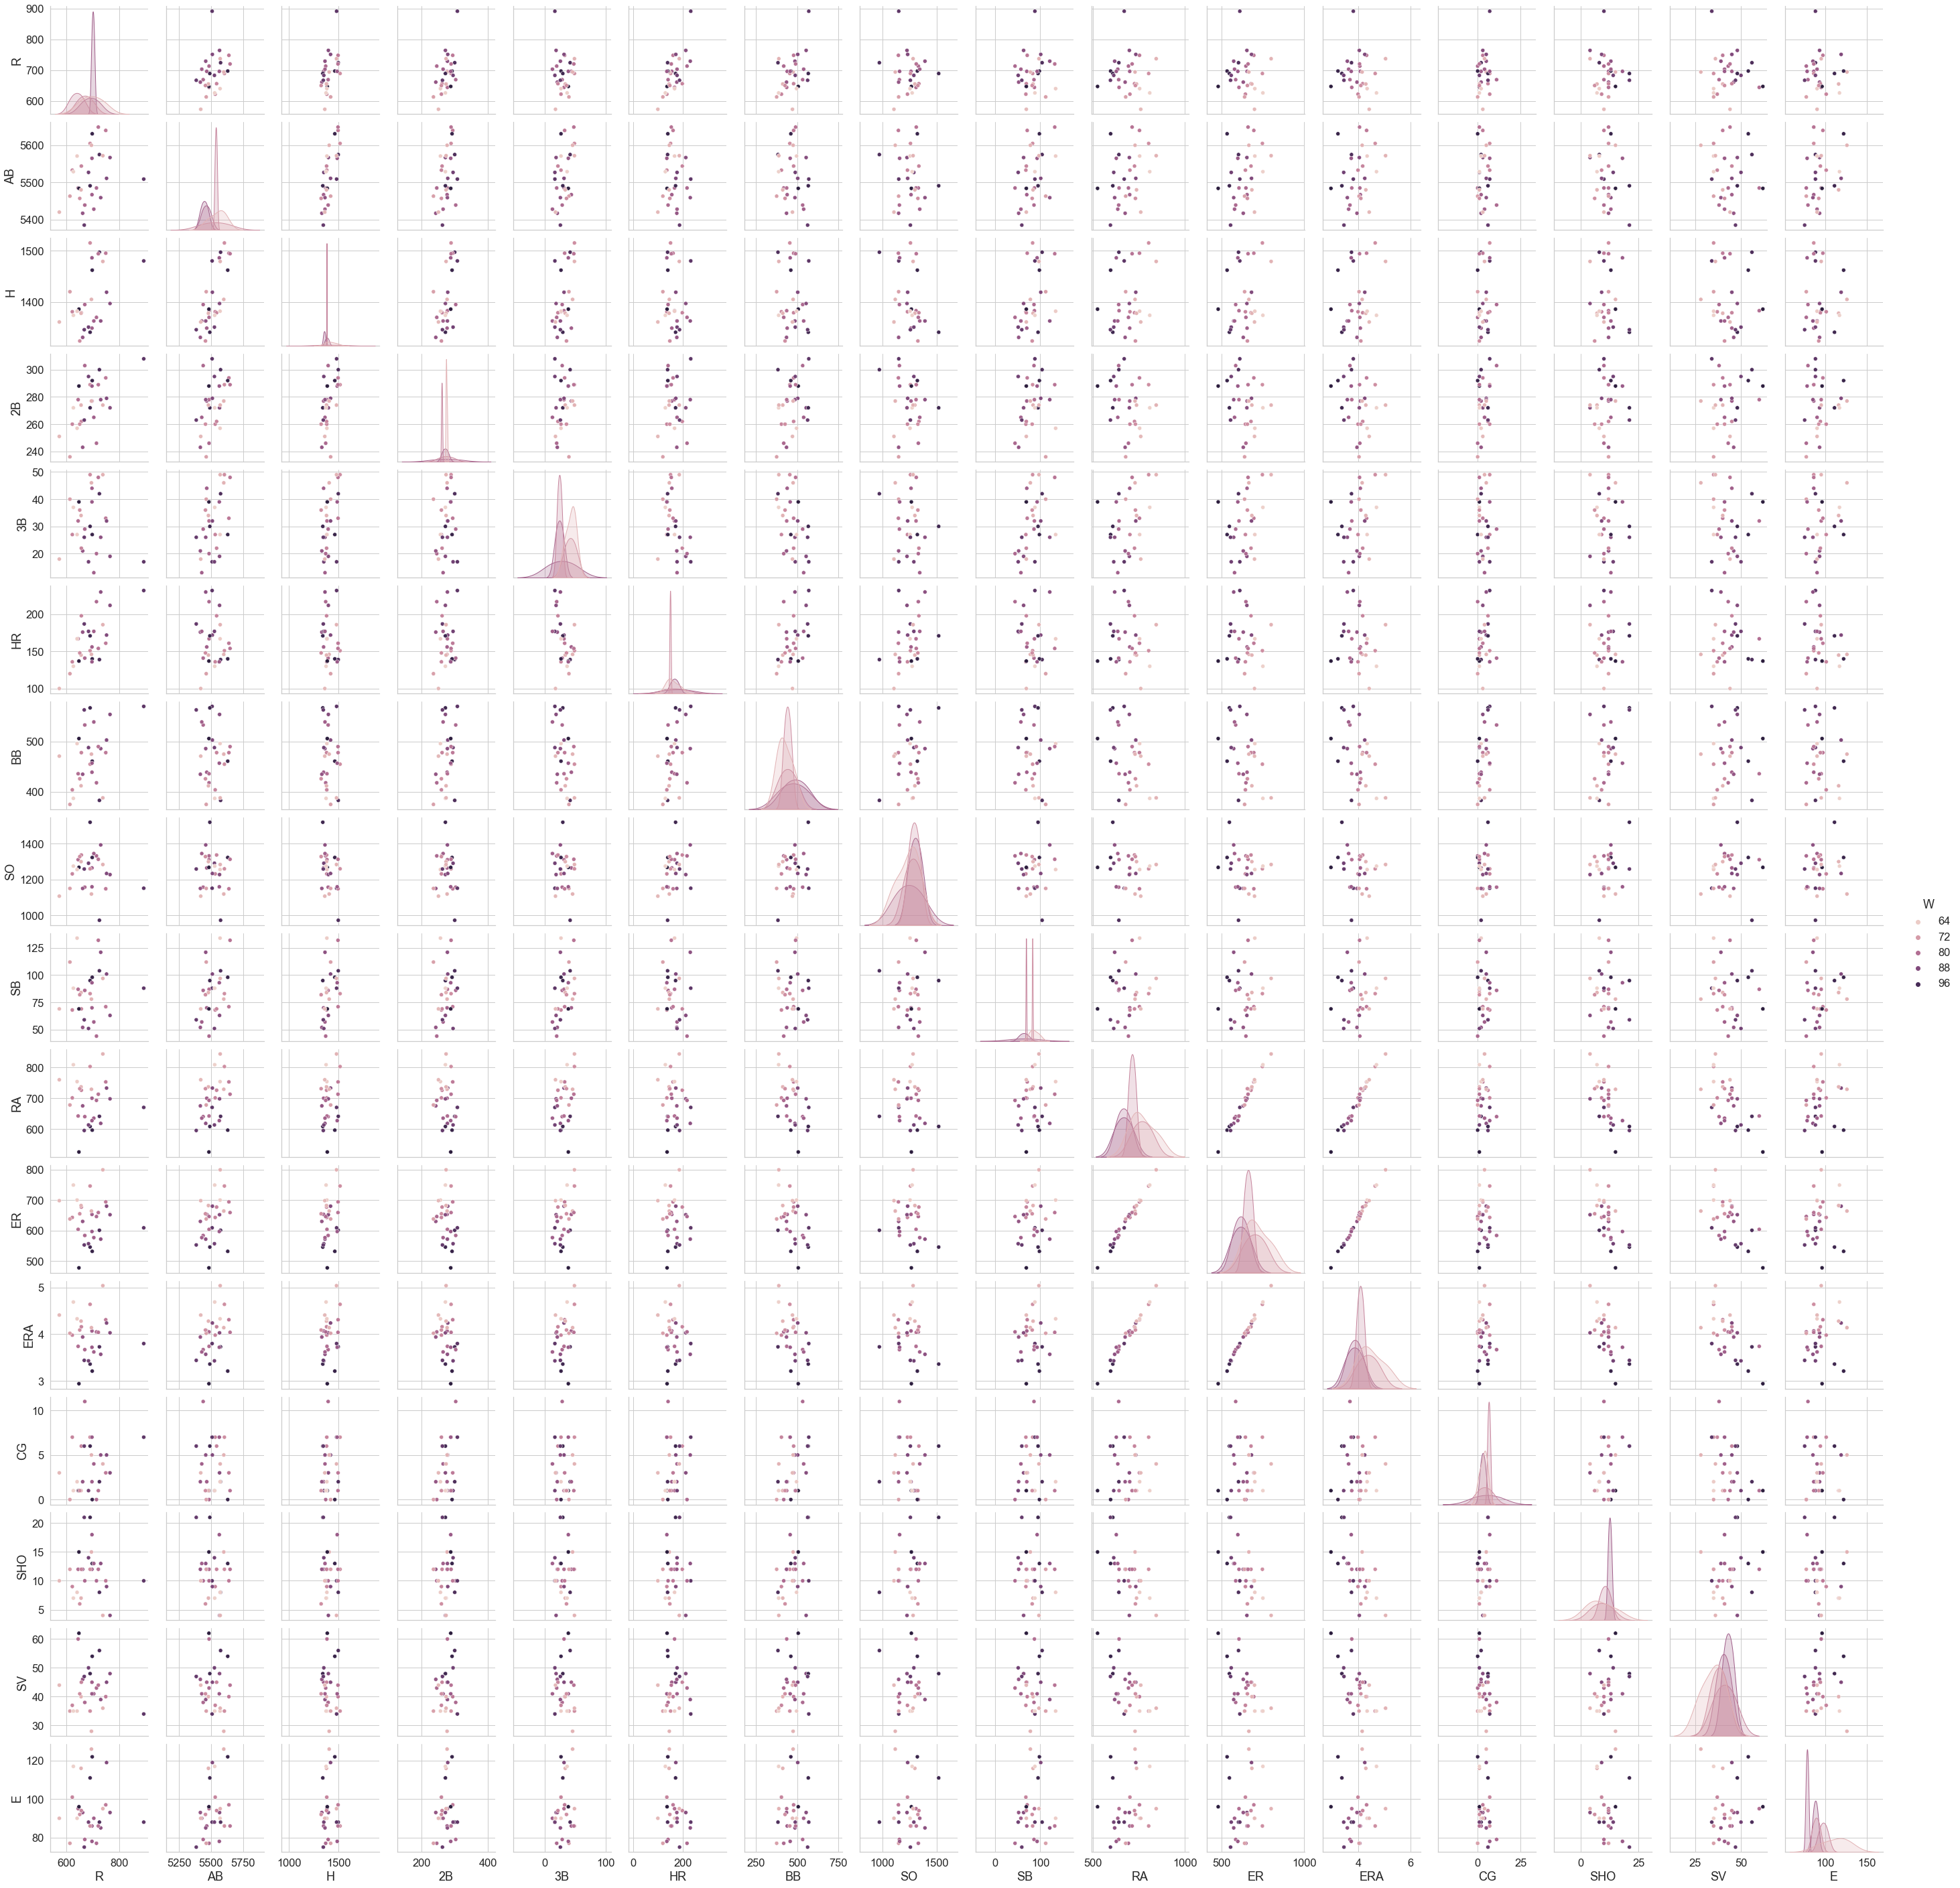

In [15]:
sns.pairplot(df,hue='W')

<AxesSubplot:>

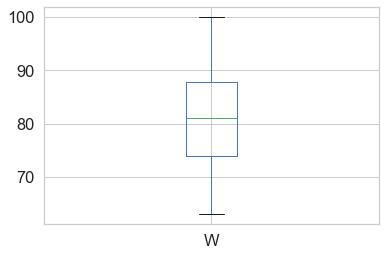

In [16]:
# boxplot for plotting the outliers

df['W'].plot.box()

No outlier is present in W .

<AxesSubplot:>

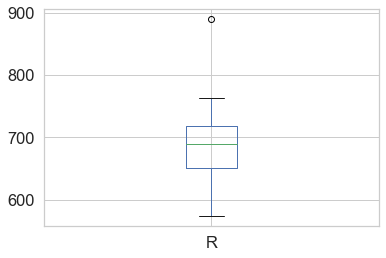

In [17]:
df['R'].plot.box()

Some outlier is there.

<Figure size 720x720 with 0 Axes>

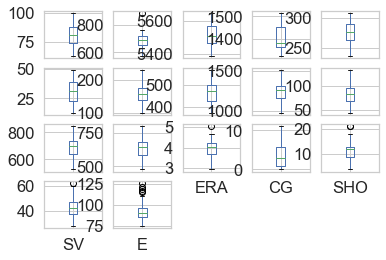

In [18]:
plt.figure(figsize=(10,10))
df.plot(kind ='box', subplots= True, layout= (4,5) )
plt.show()

some ouliers are present in the dataset .

## Correlation

In [19]:
df_corr= df.corr()
df_corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

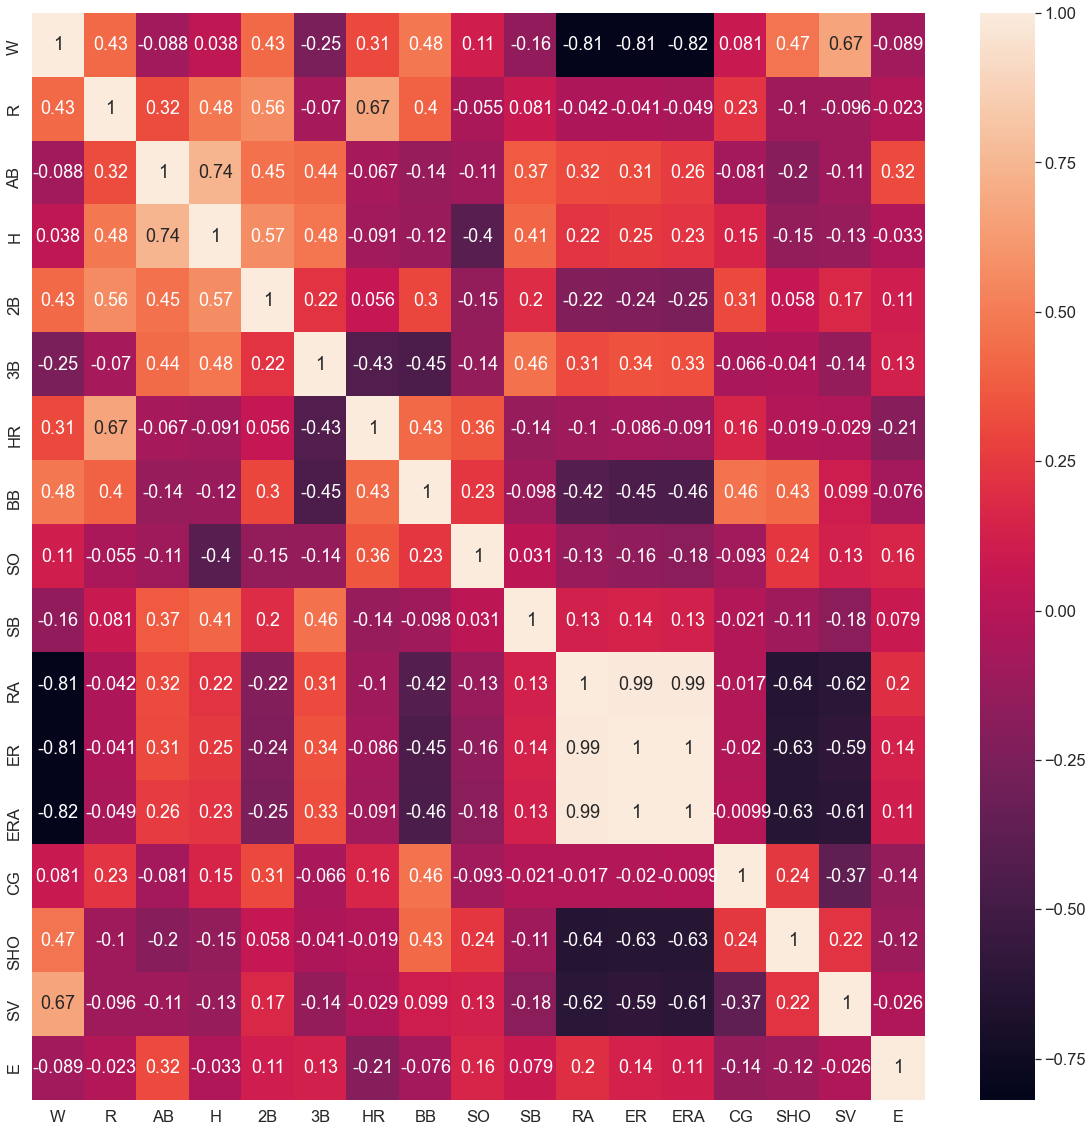

In [20]:
#correlation 

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

ERA , ER, RA , are highly negative correlated with W variable .

In [21]:
df.shape   #ERA is removed

(30, 17)

# Outliers

In [22]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [23]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [24]:
df_new=df[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [25]:
df.shape

(30, 17)

In [26]:
df_new.shape

(29, 17)

# Skewness

In [28]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [31]:
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.cbrt(df[index])

In [32]:
df.skew()

W      0.047089
R      0.892970
AB     0.183437
H      0.642599
2B    -0.230650
3B     0.129502
HR     0.175310
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -1.043632
SHO   -0.280283
SV     0.325143
E      0.719735
dtype: float64

## Data Splitting and scaling

In [33]:
x=df.drop(['W'], axis= 1)
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,8.979377,5575,11.439506,300,42,5.180101,383,973,104,641,601,3.73,1.259921,2.000000,3.825862,4.447960
1,8.862095,5467,11.049365,277,44,5.383213,439,1264,70,700,653,4.07,1.259921,2.289428,3.556893,4.414005
2,8.745985,5439,11.173556,303,29,5.204828,533,1157,86,640,584,3.67,2.223980,2.154435,3.361975,4.290840
3,8.536178,5533,11.136051,260,27,5.142563,404,1231,68,701,643,3.98,1.912931,2.080084,3.332222,4.657010
4,8.832285,5605,11.485173,289,49,5.325074,455,1259,83,803,746,4.64,1.912931,2.289428,3.271066,4.414005


In [34]:
y=df['W']
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

In [35]:
from sklearn.preprocessing import  StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

# Model training and testing

In [36]:
#splitting the data into train and test 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=48)

In [37]:
x_train.shape

(24, 16)

In [38]:
x_test.shape

(6, 16)

In [39]:
y_train.shape

(24,)

In [40]:
y_test.shape

(6,)

In [41]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [42]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
KN=KNeighborsRegressor()
SV=SVR()
DTR=DecisionTreeRegressor(random_state=48)
GBR=GradientBoostingRegressor(random_state=48)
ABR=AdaBoostRegressor(random_state=48)
RFR=RandomForestRegressor(random_state=48)

In [43]:
models=[]
models.append(("LinearRegression",LR))
models.append(("Lasso",LA))
models.append(("Ridge",RI))
models.append(("KNeighborsRegressor",KN))
models.append(("SupportVectorRegressor",SV))
models.append(("DecisionTreeRegressor",DTR))
models.append(("GradientBoostingRegressor",GBR))
models.append(("AdaBoostRegressor",ABR))
models.append(("RandomForestRegressor",RFR))

In [44]:
Model=[]
R2_score=[]
CVS=[]
MAE=[]
MSE=[]
RMSE=[]
for name,model in models:
    print("-------------------------->",name,"<---------------------")
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    pr=model.predict(x_test)
    r2=r2_score(y_test,pr)
    print("R2_score =",r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pr)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    mae=mean_absolute_error(y_test,pr)
    print("Mean_Absolute_Error =",mae)
    MAE.append(mae)
    rmse=np.sqrt(mse)
    print("Mean_Sqaured_Error =",rmse)
    RMSE.append(rmse)
    score= cross_val_score(model,x,y,cv=3,scoring='r2').mean()
    print("Cross_val_score =",score)
    CVS.append(score)
    print('\n')
    

--------------------------> LinearRegression <---------------------


R2_score = 0.8612283266146769
Mean_Squared_Error = 20.075635416410083
Mean_Absolute_Error = 3.850435857369837
Mean_Sqaured_Error = 4.480584271767476
Cross_val_score = -0.0412227384226731


--------------------------> Lasso <---------------------


R2_score = 0.9293842004703242
Mean_Squared_Error = 10.215752331959768
Mean_Absolute_Error = 2.617228006159612
Mean_Sqaured_Error = 3.1962090563603263
Cross_val_score = 0.7328063153443285


--------------------------> Ridge <---------------------


R2_score = 0.9428981956586724
Mean_Squared_Error = 8.260727694712063
Mean_Absolute_Error = 2.542259796602527
Mean_Sqaured_Error = 2.8741481685382997
Cross_val_score = 0.5605945734806682


--------------------------> KNeighborsRegressor <---------------------


R2_score = 0.7082488479262672
Mean_Squared_Error = 42.20666666666668
Mean_Absolute_Error = 5.7
Mean_Sqaured_Error = 6.496665811527223
Cross_val_score = 0.48267290272182795



In [45]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error' :MAE,'Root_Mean_Squared_Error' :RMSE,'Cross_val_score':CVS})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.861228,20.075635,3.850436,4.480584,-0.041223
1,Lasso,0.929384,10.215752,2.617228,3.196209,0.732806
2,Ridge,0.942898,8.260728,2.542260,2.874148,0.560595
3,KNeighborsRegressor,0.708249,42.206667,5.700000,6.496666,0.482673
4,SupportVectorRegressor,0.150961,122.827618,9.189176,11.082762,-0.061253
5,DecisionTreeRegressor,0.296083,101.833333,9.500000,10.091250,-0.156983
6,GradientBoostingRegressor,0.495246,73.021104,7.128556,8.545239,0.335957
7,AdaBoostRegressor,0.701449,43.190427,5.037879,6.571942,0.469593
8,RandomForestRegressor,0.728211,39.318783,5.411667,6.270469,0.455452


Lasso and Ridge both ensemble techniques are giving highest accuracy , we'll go with Lasso beacuse of less diff between r2 score and cv score.

### Hyperparameter tuning

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}

In [48]:
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [49]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [50]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 5}

# Saving the model

In [51]:
import joblib
joblib.dump(LA,"Baseball_model.pkl")

['Baseball_model.pkl']

In [52]:
model=joblib.load("Baseball_model.pkl")


In [53]:
pred= model.predict(x_test)
pred

array([83.74025319, 74.10276244, 74.22861043, 65.35495429, 81.215495  ,
       96.82168606])

In [54]:
print("Prediction", pred)
print("Actual", y_test)

Prediction [83.74025319 74.10276244 74.22861043 65.35495429 81.215495   96.82168606]
Actual 26     84
3      76
18     68
24     63
1      83
15    100
Name: W, dtype: int64


In [55]:
print('error:')

print('mean absolute error:', mean_absolute_error(y_test,pred))
print('mean squared error:', mean_squared_error(y_test,pred))

print('Root mean squred error', np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 2.617228006159612
mean squared error: 10.215752331959768
Root mean squred error 3.1962090563603263
